# This is an example of a T-test done to analyze an A/B test of an email marketing campaign

One of the main metrics that are used to analyze the sucess of an email marketing campaign is the click through rate (CTR), also known as the click rate.  A marketing campaign (also called promotion) can have multiple creatives.  A creative is the actual advertisement you see when you open the email.  If you click on the link within the email, it gets registered as a click, and the click through rate is calculated by the following: clicks/number of emails sent.  An email marketer's goal is to have creatives with high click through rates.

This code is a very simple demonstration of how I tested various creatives for a certain campaign.  In this code, we will use fake email data, that contains one promotion with three different creatives and their corresponding click rates.

## Basic Data Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [2]:
data=pd.read_csv("Sample Email Data - Creative Test.csv")

In [3]:
data.head()

,Promotion,Creative,Click Rate (%)
0,Promotion X,Creative A,0.070
1,Promotion X,Creative B,0.136
2,Promotion X,Creative A,0.064
3,Promotion X,Creative C,0.068
4,Promotion X,Creative B,0.169


In [4]:
data['Promotion'].value_counts()

Promotion X    60
Name: Promotion, dtype: int64

In [5]:
data['Creative'].value_counts()

Creative A    20
Creative B    20
Creative C    20
Name: Creative, dtype: int64

<AxesSubplot:xlabel='Index', ylabel='Click Rate %'>

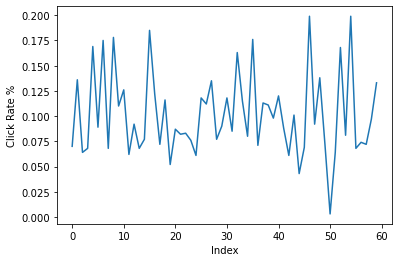

In [6]:
data["Click Rate (%)"].plot(xlabel='Index', ylabel='Click Rate %')

As we can see, there is one promotion ("Promotion X"), and 3 creatives, with 20 sends for each creative.  The click rates range somewhere beteween 0.00%-0.20%.

## Analysis and Test

In [7]:
def creative_distribution(promotion_name):
    promotion=data[data['Promotion']==promotion_name]
    x=promotion.groupby(['Creative'])['Click Rate (%)'].agg(['mean','count']).sort_values(by='mean', ascending=False)
    return x

In [8]:
creative_distribution("Promotion X")

,mean,count
Creative,,
Creative B,0.1234,20
Creative A,0.1022,20
Creative C,0.0790,20


The creative_distribution() function allows us to input a promotion and see the average click rate for each creative, as well as how many times each creative was sent.  As we can see, "Creative B" has the highest average.  But we can't yet say that it is significantly larger than the other creatives, which is why we do a t-test.

In [9]:
def test(promotion, creative1, creative2):
    a=data[data['Creative']==creative1]['Click Rate (%)']
    b=data[data['Creative']==creative2]['Click Rate (%)']
    a.plot(kind='kde',grid=False, title=promotion, color='b', label=creative1)
    b.plot(kind='kde',grid=False, color='r', label=creative2)
    plt.legend()
    plt.xlabel('Click Rate %')
    plt.show()

    stat, p = ttest_ind(a,b)
    if p>0.05:
        print("SIMILAR distributions, p =", round(p,4))
    else:
        print("DIFFERENT distributions, p =", round(p,4))
    
    print("\n")
    print("The mean click rate of {} is {:.4f}".format(creative1, a.mean()))
    print("The mean click rate of {} is {:.4f}".format(creative2, b.mean()))

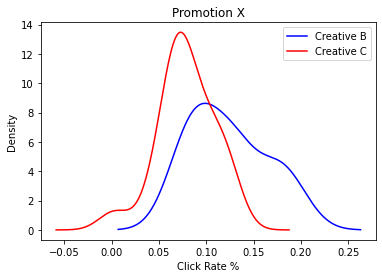

DIFFERENT distributions, p = 0.0003


The mean click rate of Creative B is 0.1234
The mean click rate of Creative C is 0.0790


In [10]:
test("Promotion X", "Creative B", "Creative C")

The test() function allows us to input a promotion and two creatives.  In this example we are looking to see if the click rates for "Creative B" are significantly larger than "Creative C" for our "Promotion X". The function returns the click rate distributions of the two creatives, the average click rate, and whether or not the difference between the means of the two distributions is significant.  As we can see here, p=0.0003, so there is a significant differnce (assuming a significance level of 0.05) between the click rates generated between the two creatives.  Because the mean click rate of "Creative B" is greater than that of "Creative C" with statistical significance, we can reasonably adjust our sending to send more campaigns with "Creative B" to achieve high higher click rates.